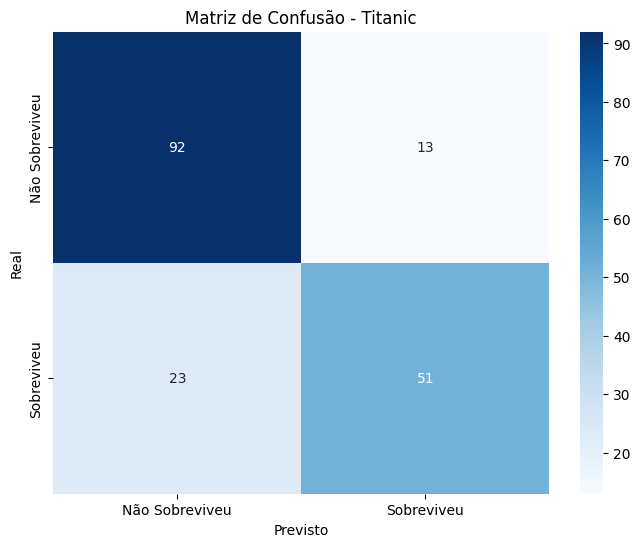


Acurácia na validação: 0.7988826815642458
Precisão: 0.796875
Recall: 0.6891891891891891
F1-Score: 0.7391304347826086


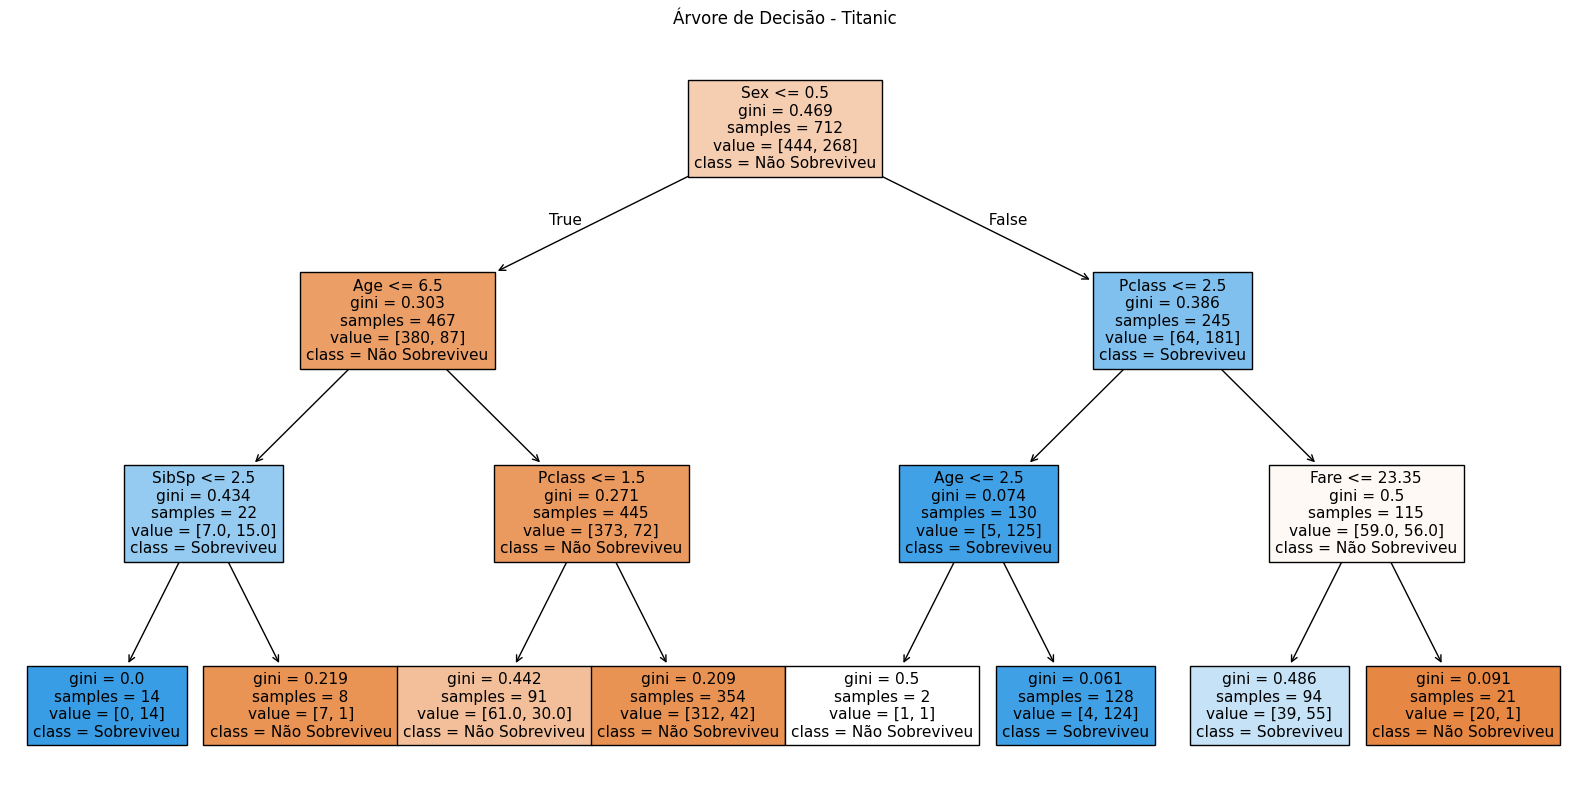

    Feature  Importance
1       Sex    0.605737
0    Pclass    0.209536
2       Age    0.075353
5      Fare    0.061240
3     SibSp    0.048135
4     Parch    0.000000
6  Embarked    0.000000

Arquivo de submissão gerado: submission.csv


<Figure size 640x480 with 0 Axes>

In [3]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import os
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# 1. Leitura dos Dados
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
gender_submission_df = pd.read_csv("gender_submission.csv") 


# 2. Pré-processamento dos Dados

train_df.loc[:, "Age"] = train_df["Age"].fillna(train_df["Age"].median())
test_df.loc[:, "Age"] = test_df["Age"].fillna(test_df["Age"].median())
test_df.loc[:, "Fare"] = test_df["Fare"].fillna(test_df["Fare"].median())
train_df.loc[:, "Embarked"] = train_df["Embarked"].fillna(train_df["Embarked"].mode()[0])


# 2.2. Conversão de variáveis categóricas em numéricas
train_df["Sex"] = train_df["Sex"].map({"male": 0, "female": 1})
test_df["Sex"] = test_df["Sex"].map({"male": 0, "female": 1})

embarked_mapping = {"S": 0, "C": 1, "Q": 2}
train_df["Embarked"] = train_df["Embarked"].map(embarked_mapping)
test_df["Embarked"] = test_df["Embarked"].map(embarked_mapping)

# 3. Seleção de Variáveis (Features) para o Modelo
# Seleciona as features consideradas importantes para o modelo
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

# Define X (variáveis independentes) e y (variável alvo) do conjunto de treino
X = train_df[features]
y = train_df["Survived"]


# 4. Divisão do Conjunto de Treino para Validação Interna
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# 5. Treinamento da Árvore de Decisão
# Inicializa e treina o classificador de árvore de decisão com profundidade máxima de 3
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)


# 6. Avaliação do Modelo no Conjunto de Validação
y_val_pred = clf.predict(X_val)


# 6. Avaliação do Modelo no Conjunto de Validação
y_val_pred = clf.predict(X_val)

acc = accuracy_score(y_val, y_val_pred)
prec = precision_score(y_val, y_val_pred)
rec = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

# Calcula a matriz de confusão
cm = confusion_matrix(y_val, y_val_pred)

# Cria a figura da matriz de confusão 
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Não Sobreviveu", "Sobreviveu"], yticklabels=["Não Sobreviveu", "Sobreviveu"])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Titanic')
plt.savefig("matriz_confusao_titanic.png", dpi=300)
plt.show()

print("\nAcurácia na validação:", acc)
print("Precisão:", prec)
print("Recall:", rec)
print("F1-Score:", f1)


# 7. Visualização da Árvore de Decisão

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=features, class_names=["Não Sobreviveu", "Sobreviveu"], filled=True)
plt.title("Árvore de Decisão - Titanic")
plt.show()


# 8. Predição no Conjunto de Teste e Geração do Arquivo de Submissão

test_pred = clf.predict(test_df[features])

# Cria o DataFrame para submissão 
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": test_pred
})


plt.savefig("decision_tree.png", dpi=300)

importances = pd.DataFrame({"Feature": features, "Importance": clf.feature_importances_})
print(importances.sort_values(by="Importance", ascending=False))

# Salva o arquivo de submissão no formato CSV
submission.to_csv("submission.csv", index=False)
print("\nArquivo de submissão gerado: submission.csv")
